In [169]:
import pandas as pd
import numpy as np
import bamboolib as bam
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
# Import Data
df = pd.read_csv(r'/Users/lucyleng/Desktop/ALY 6040/ML Models/bike_crash (1).csv')

Part 1:
Build a Logistic Regression model to predict, Severity ( Possibly Injury, Incapacitating Injury, Killed vs. a non severe incident). Talk about which features were important from the model and if the model is accurate.

In [171]:
# Checking null variables
df.isnull().sum()

$1000 Damage to Any One Person's Property    0
Active School Zone Flag                      0
At Intersection Flag                         0
Average Daily Traffic Amount                 0
Construction Zone Flag                       0
Crash Severity                               0
Crash Time                                   0
Crash Total Injury Count                     0
Crash Year                                   0
Day of Week                                  0
Intersection Related                         0
Roadway Part                                 0
Speed Limit                                  0
Surface Condition                            0
Traffic Control Type                         0
Person Helmet                                0
dtype: int64

In [172]:
df.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Average Daily Traffic Amount',
       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'],
      dtype='object')

In [173]:
# Show the data type of each column
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Construction Zone Flag                       object
Crash Severity                               object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
dtype: object


In [174]:
df

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No Data,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,Intersection Related,Main/Proper Lane,40,Dry,Signal Light,Not Worn
2459,No,No,True,No Data,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,-1,Dry,Center Stripe/Divider,Not Worn
2460,No,No,True,No Data,No,Not Injured,737,0,2017,Thursday,Intersection Related,Main/Proper Lane,30,Wet,Signal Light,Not Worn
2461,Yes,No,True,No Data,No,Non-Incapacitating Injury,930,1,2017,Friday,Intersection,Main/Proper Lane,-1,Dry,Stop Sign,"Worn, Unk Damage"


In [175]:
len(df[df['Average Daily Traffic Amount'] == 'No Data'])/len(df)

0.8566788469346326

In [176]:
# do not use 'Average Daily Traffic Amount' because 86% of the data shows no data
#df_1 = df[['$1000 Damage to Any One Person\'s Property', 'Active School Zone Flag','At Intersection Flag',
#       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
#       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
#       'Intersection Related', 'Roadway Part', 'Speed Limit',
#       'Surface Condition', 'Traffic Control Type', 'Person Helmet']]

In [177]:
#df_1

In [178]:
# converting yes/no answers to 1/0, severity classifed as 1/0
df = df.replace({'$1000 Damage to Any One Person\'s Property': {'Yes': 1, 
                                'No': 0}})
df = df.replace({'Crash Severity': {'Incapacitating Injury': 1, 'Possible Injury':1, 'Killed':1, 'Non-Incapacitating Injury': 0,'Not Injured':0}})
df = df.replace({'Active School Zone Flag': {'Yes': 1, 
                                'No': 0}})
df = df.replace({'Construction Zone Flag': {'Yes': 1, 
                                'No': 0}})

#df['Crash Severity'] = df['Crash Severity'].map({'Incapacitating Injury': 1, 'Possibly Injury':1, 'Killed':1, 'Non-Incapacitating Injury': 0,'Not Injured':0})
#df['At Intersection Flag'] = df['At Intersection Flag'].map({'True': 1, 'False': 0})

In [179]:
# Show the data type of each column
result = df['At Intersection Flag'].astype(int)
df['At Intersection Flag'] = result


In [180]:
#df

In [181]:
# Remove column name 'Average Daily Traffic Amount'
df = df.drop(['Average Daily Traffic Amount'], axis = 1)

In [182]:
# Show the data type of each column
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
$1000 Damage to Any One Person's Property     int64
Active School Zone Flag                       int64
At Intersection Flag                          int64
Construction Zone Flag                        int64
Crash Severity                                int64
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
dtype: object


In [183]:
# Creating dummy variables from one columns of gender, preferred color, favorite flavor of ice cream, and income:
df_Dummy = pd.get_dummies(df, columns=['Day of Week',
       'Intersection Related', 'Roadway Part',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'])
df_Dummy

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,Day of Week_Friday,...,Traffic Control Type_Signal Light,Traffic Control Type_Signal Light With Red Light Running Camera,Traffic Control Type_Stop Sign,Traffic Control Type_Warning Sign,Traffic Control Type_Yield Sign,Person Helmet_Not Worn,Person Helmet_Unknown If Worn,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged","Person Helmet_Worn, Unk Damage"
0,0,0,0,0,1,239,1,2010,45,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,310,2,2010,35,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,310,2,2010,35,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,310,2,2010,35,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,2300,1,2010,45,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,0,1,0,0,1254,1,2017,40,0,...,1,0,0,0,0,1,0,0,0,0
2459,0,0,1,0,0,2048,1,2017,-1,0,...,0,0,0,0,0,1,0,0,0,0
2460,0,0,1,0,0,737,0,2017,30,0,...,1,0,0,0,0,1,0,0,0,0
2461,1,0,1,0,0,930,1,2017,-1,1,...,0,0,1,0,0,0,0,0,0,1


#df_Dummy.columns

In [184]:
# Logistic regression
#Split train and test as 80/20
#x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.20)
from sklearn.model_selection import train_test_split
x = df_Dummy[['$1000 Damage to Any One Person\'s Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag',
       'Crash Time', 'Crash Total Injury Count', 'Crash Year', 'Speed Limit',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday',
       'Roadway Part_Main/Proper Lane',
       'Roadway Part_Other (Explain In Narrative)',
       'Roadway Part_Service/Frontage Road', 'Surface Condition_Dry','Surface Condition_Ice',
       'Surface Condition_Other (Explain In Narrative)',
       'Surface Condition_Sand, Mud, Dirt', 'Surface Condition_Standing Water',
       'Surface Condition_Unknown', 'Surface Condition_Wet', 'Person Helmet_Not Worn',
       'Person Helmet_Unknown If Worn', 'Person Helmet_Worn, Damaged',
       'Person Helmet_Worn, Not Damaged', 'Person Helmet_Worn, Unk Damage']]
Y = df_Dummy[['Crash Severity']]

x_train, x_test, z_train, z_test = train_test_split(x, Y, test_size=0.20, random_state = 0)

In [185]:
df_Dummy.corr()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,Day of Week_Friday,...,Traffic Control Type_Signal Light,Traffic Control Type_Signal Light With Red Light Running Camera,Traffic Control Type_Stop Sign,Traffic Control Type_Warning Sign,Traffic Control Type_Yield Sign,Person Helmet_Not Worn,Person Helmet_Unknown If Worn,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged","Person Helmet_Worn, Unk Damage"
$1000 Damage to Any One Person's Property,1.000000,0.002890,-0.006189,0.009189,0.065691,-0.058990,0.172291,0.044688,0.018311,-0.031674,...,-0.041813,-0.005963,-0.030605,0.028400,0.003533,-0.046148,-0.004220,0.059565,0.003115,0.036605
Active School Zone Flag,0.002890,1.000000,-0.036741,-0.003878,-0.000150,-0.028247,-0.002664,-0.011454,-0.016591,-0.016173,...,0.006422,-0.003607,-0.015170,-0.001220,-0.003812,0.031553,-0.016421,-0.008861,-0.013999,-0.009539
At Intersection Flag,-0.006189,-0.036741,1.000000,-0.005643,-0.024042,0.091936,-0.093733,0.033365,-0.017153,0.003116,...,0.376063,0.050441,0.274947,-0.013430,0.028372,-0.046435,-0.013339,0.029736,0.060848,0.000514
Construction Zone Flag,0.009189,-0.003878,-0.005643,1.000000,-0.008318,0.000960,-0.014600,-0.036420,0.001888,0.016516,...,0.011910,0.024748,0.012534,-0.003878,-0.012121,0.018480,0.005456,0.002874,-0.023079,-0.015768
Crash Severity,0.065691,-0.000150,-0.024042,-0.008318,1.000000,0.017224,0.143003,0.035697,0.014952,-0.042584,...,-0.008437,0.044434,-0.023831,-0.000150,0.042050,-0.022047,0.005422,-0.003496,0.006576,0.029276
Crash Time,-0.058990,-0.028247,0.091936,0.000960,0.017224,1.000000,0.008288,0.036539,-0.081533,0.021458,...,0.002814,-0.016657,0.035814,-0.016853,-0.014361,-0.003276,0.029630,-0.027400,-0.018276,0.012054
Crash Total Injury Count,0.172291,-0.002664,-0.093733,-0.014600,0.143003,0.008288,1.000000,-0.081439,0.036863,-0.037980,...,-0.049079,0.008563,-0.046019,-0.002664,-0.002096,-0.063496,0.145667,-0.009492,-0.047129,-0.023484
Crash Year,0.044688,-0.011454,0.033365,-0.036420,0.035697,0.036539,-0.081439,1.000000,-0.082059,-0.001767,...,-0.081009,0.037989,-0.062249,0.004081,-0.009569,-0.082344,0.022899,0.012733,0.040916,0.058918
Speed Limit,0.018311,-0.016591,-0.017153,0.001888,0.014952,-0.081533,0.036863,-0.082059,1.000000,0.000580,...,-0.006281,0.037460,-0.044348,0.024489,0.022378,-0.008169,-0.027115,0.024118,0.027304,-0.002655
Day of Week_Friday,-0.031674,-0.016173,0.003116,0.016516,-0.042584,0.021458,-0.037980,-0.001767,0.000580,1.000000,...,-0.007851,0.045922,0.008577,-0.016173,-0.030813,0.035340,-0.021482,0.020921,-0.009943,-0.042729


In [186]:
# logistic regression Model
import statsmodels.api as sm
Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

         Current function value: 0.612813
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Crash Severity   No. Observations:                 1970
Model:                          Logit   Df Residuals:                     1942
Method:                           MLE   Df Model:                           27
Date:                Sun, 08 May 2022   Pseudo R-squ.:                 0.04004
Time:                        17:12:10   Log-Likelihood:                -1207.2
converged:                      False   LL-Null:                       -1257.6
Covariance Type:            nonrobust   LLR p-value:                 1.966e-10
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                            -59.9012   1.22e+07  -4

Unable to include the varialbes "Intersection Related" and "Traffic Control Type" because singular matrix error, 

0.1167170000000084


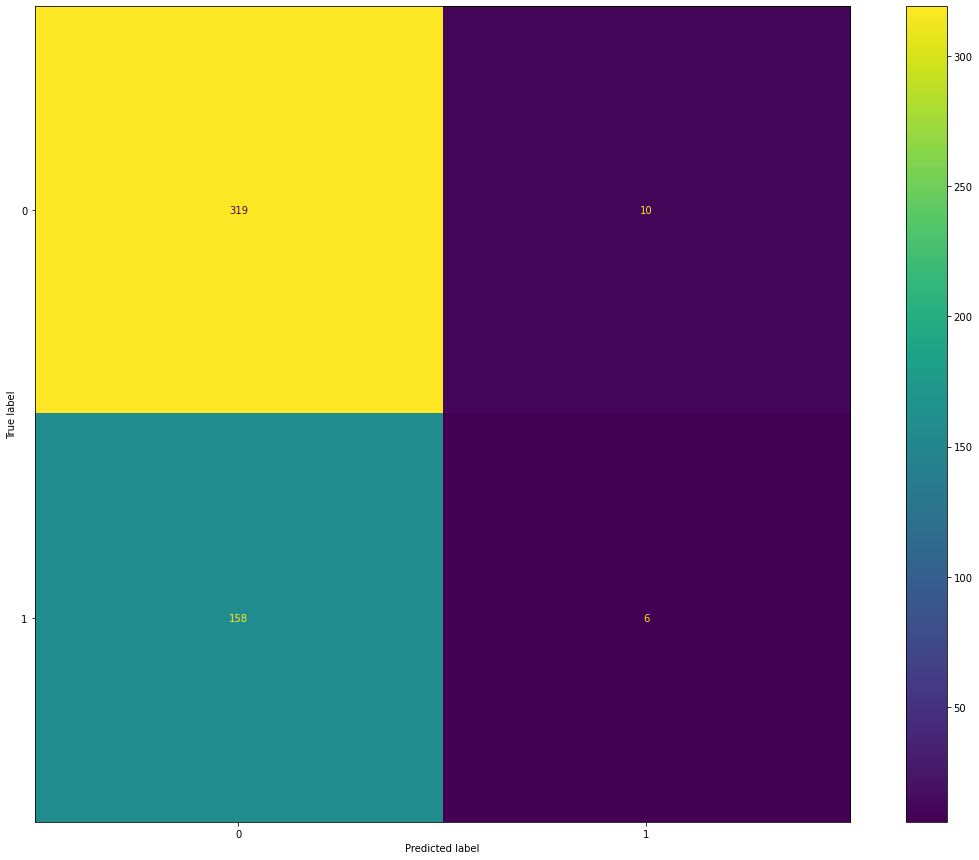

In [216]:
# Interprete the results
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# record time
import time
start = time.process_time()
# Run model
logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,z_train)
print(time.process_time() - start)
#view results
model.fit(x_train, z_train)
plot_confusion_matrix(logistic_regression, x_test, z_test)  
plt.grid(False)# delete white grid lines

In [188]:
# total test
# Accuracy
acurracy = round(model.score(x_test,z_test),4)
acurracy

0.6592

In [189]:
# MAE
from sklearn.metrics import mean_absolute_error
y_pred1 = model.predict(x_test)
mean_absolute_error(z_test, y_pred1)

0.3407707910750507

#########################################################################################

Part 2:Decision Tree (Using Sklearn)

Build a Decision Tree model to predict the type of incident. Compare which metrics are important in this model vs significant in the Logistic Model and how the model compares. Run with a max of 4 branches

In [190]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [215]:
# Record the time needed to run the code
import time
start = time.process_time()
# Decision tree model using Sklearn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, class_weight=None, random_state=1234)

# Train Decision Tree Classifer
clf = clf.fit(x_train,z_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print(time.process_time() - start)

0.015129000000001724


In [192]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(z_test, y_pred))

Accuracy: 0.6693711967545639


In [193]:
#view summary

In [194]:
# MAE
mean_absolute_error(z_test, y_pred)

0.3306288032454361

<Figure size 216x216 with 0 Axes>

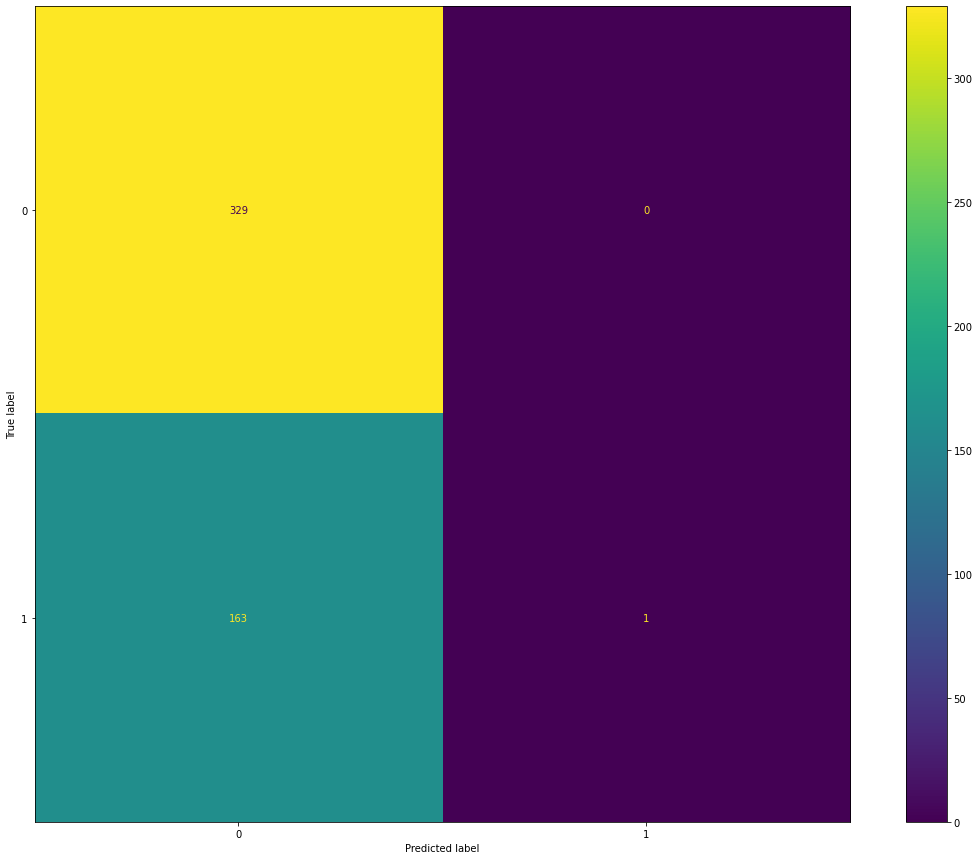

In [195]:
plt.figure(figsize = (3,3))
clf.fit(x_train, z_train)
plot_confusion_matrix(clf, x_test, z_test)  
plt.grid(False)# delete white grid lines

[Text(429.5131578947369, 489.24, 'X[5] <= 0.5\ngini = 0.446\nsamples = 1970\nvalue = [1308, 662]'),
 Text(220.26315789473685, 380.52000000000004, 'X[4] <= 2324.0\ngini = 0.124\nsamples = 135\nvalue = [126, 9]'),
 Text(176.21052631578948, 271.8, 'X[0] <= 0.5\ngini = 0.112\nsamples = 134\nvalue = [126, 8]'),
 Text(88.10526315789474, 163.08000000000004, 'X[15] <= 0.5\ngini = 0.055\nsamples = 106\nvalue = [103, 3]'),
 Text(44.05263157894737, 54.360000000000014, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(132.1578947368421, 54.360000000000014, 'gini = 0.022\nsamples = 89\nvalue = [88, 1]'),
 Text(264.3157894736842, 163.08000000000004, 'X[13] <= 0.5\ngini = 0.293\nsamples = 28\nvalue = [23, 5]'),
 Text(220.26315789473685, 54.360000000000014, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(308.36842105263156, 54.360000000000014, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(264.3157894736842, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(638.7631578947369, 380.

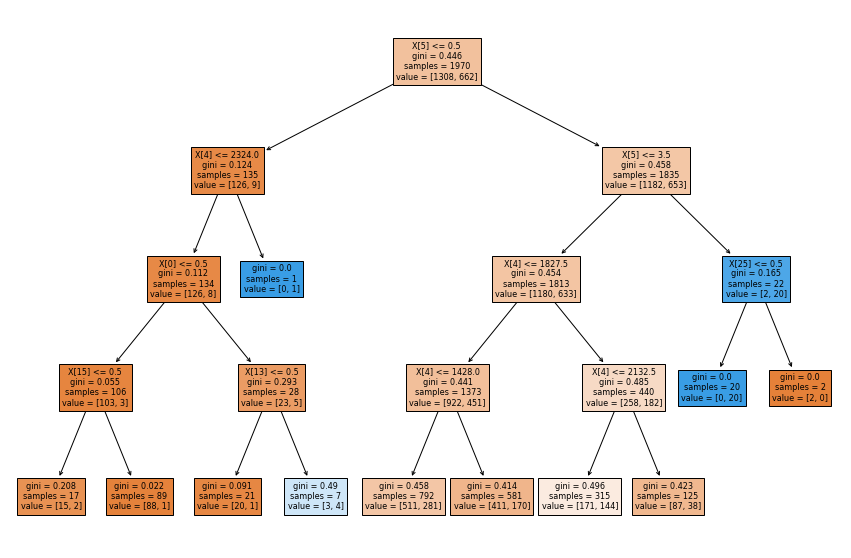

In [196]:
# Decision Tree visualization
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(clf,filled = True)

In [197]:
# get importance
#importance = clf.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))

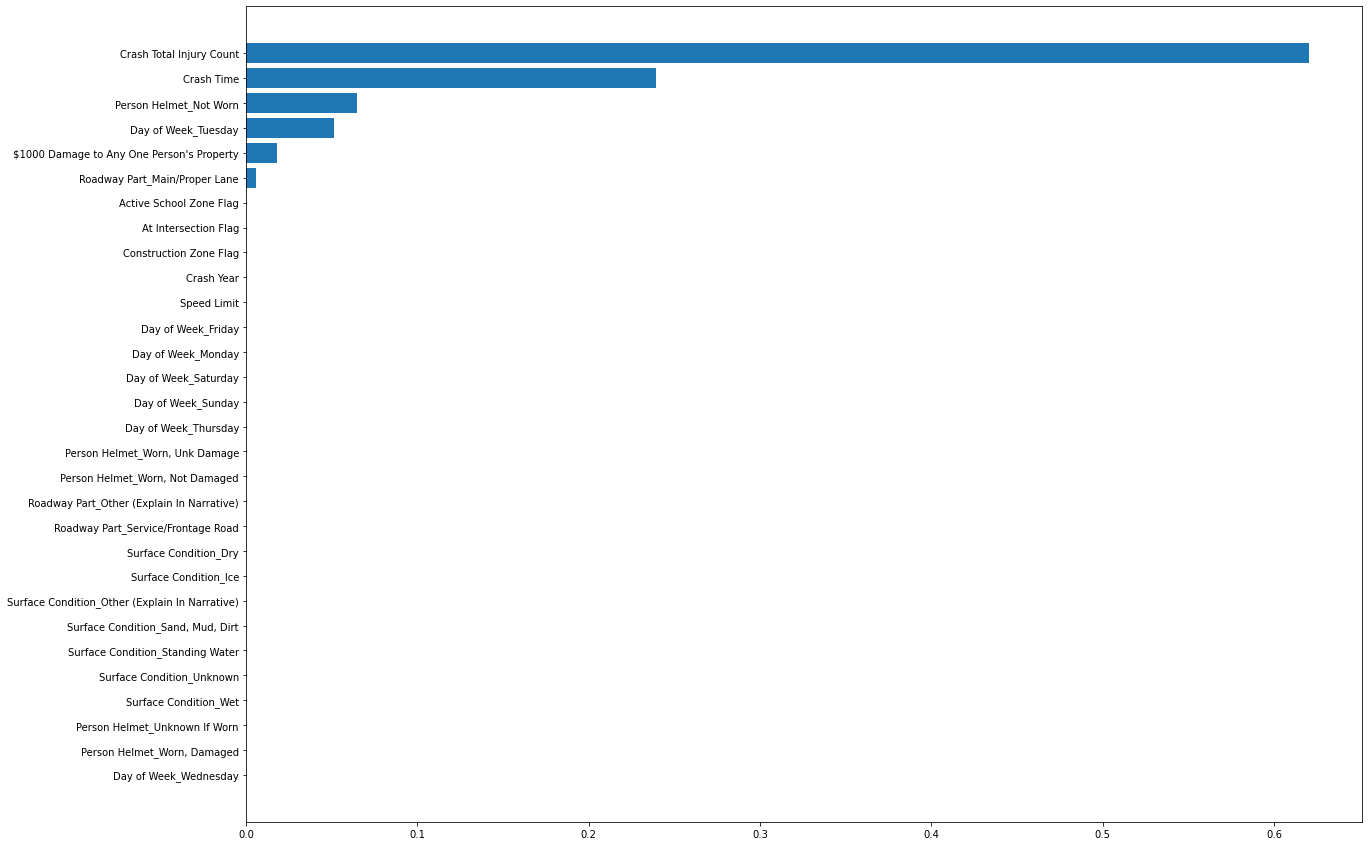

In [198]:
#Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

##########################################################################################    
Build a Random Forest model to predict the type of incident. Compare which metrics are important in this model vs significant in the previous models and how the model compares. Run with minimum trees of 5000 and max 4 branches

In [214]:
#Import Random Forest Model
import time
start = time.process_time()

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf3=RandomForestClassifier(n_estimators=8000,max_depth=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf3.fit(x_train,z_train)

y_pred3=clf3.predict(x_test)

#code here
print(time.process_time() - start)

14.874055999999996


In [206]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(z_test, y_pred3))

Accuracy: 0.6693711967545639


In [207]:
# get importance
importance = clf3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature: 0, Score: 0.04901
Feature: 1, Score: 0.00197
Feature: 2, Score: 0.02314
Feature: 3, Score: 0.00682
Feature: 4, Score: 0.15992
Feature: 5, Score: 0.28651
Feature: 6, Score: 0.06974
Feature: 7, Score: 0.05573
Feature: 8, Score: 0.02102
Feature: 9, Score: 0.01486
Feature: 10, Score: 0.00801
Feature: 11, Score: 0.01342
Feature: 12, Score: 0.00935
Feature: 13, Score: 0.01085
Feature: 14, Score: 0.01974
Feature: 15, Score: 0.01593
Feature: 16, Score: 0.00859
Feature: 17, Score: 0.01733
Feature: 18, Score: 0.06199
Feature: 19, Score: 0.00050
Feature: 20, Score: 0.00854
Feature: 21, Score: 0.00025
Feature: 22, Score: 0.00037
Feature: 23, Score: 0.02850
Feature: 24, Score: 0.04291
Feature: 25, Score: 0.01232
Feature: 26, Score: 0.01766
Feature: 27, Score: 0.01135
Feature: 28, Score: 0.01181
Feature: 29, Score: 0.01183


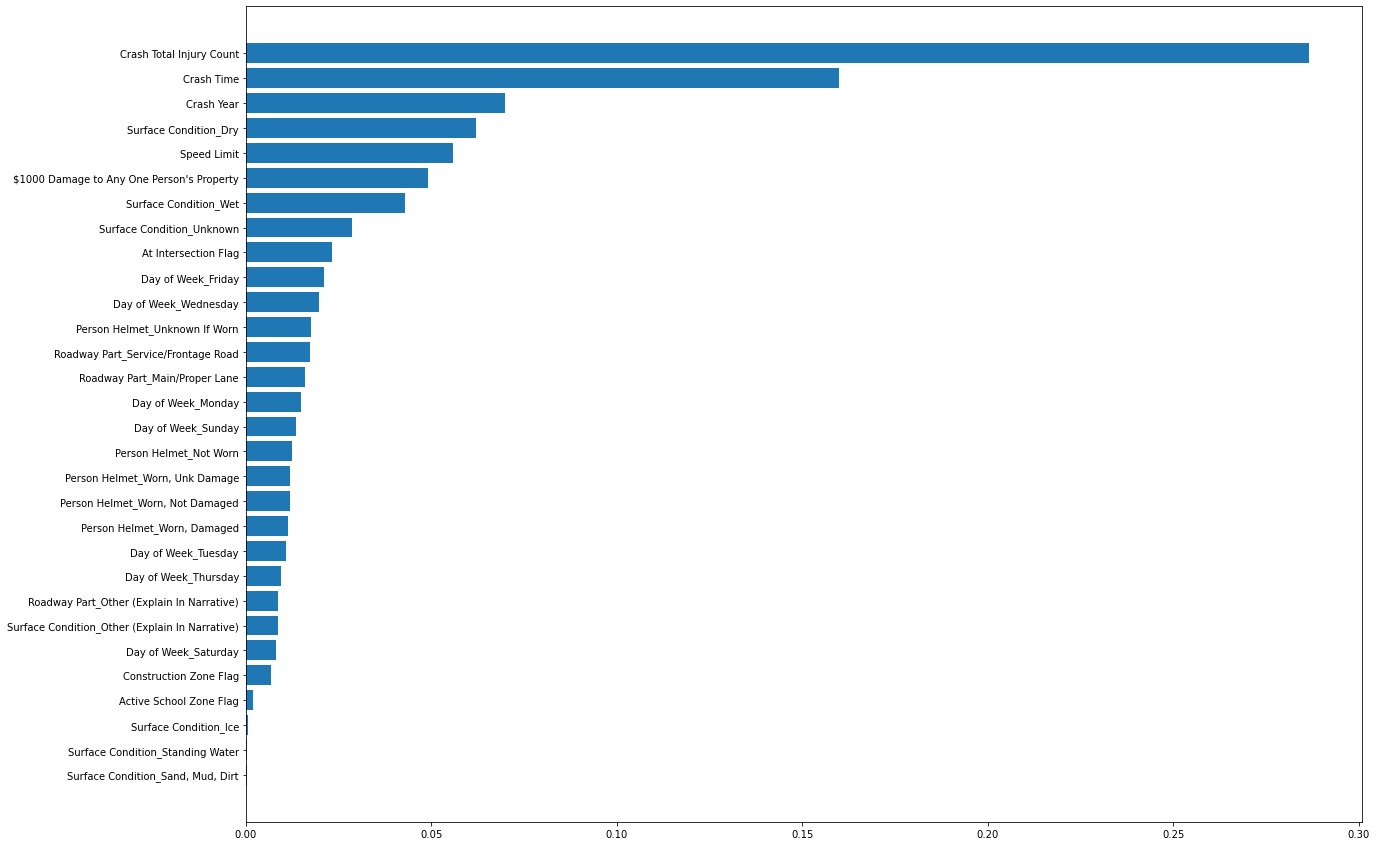

In [208]:
#Feature Importance (Bar Plot)
importances = clf3.feature_importances_
indices = np.argsort(importances)
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [209]:
# MAE
mean_absolute_error(z_test, y_pred3)

0.3306288032454361

<Figure size 216x216 with 0 Axes>

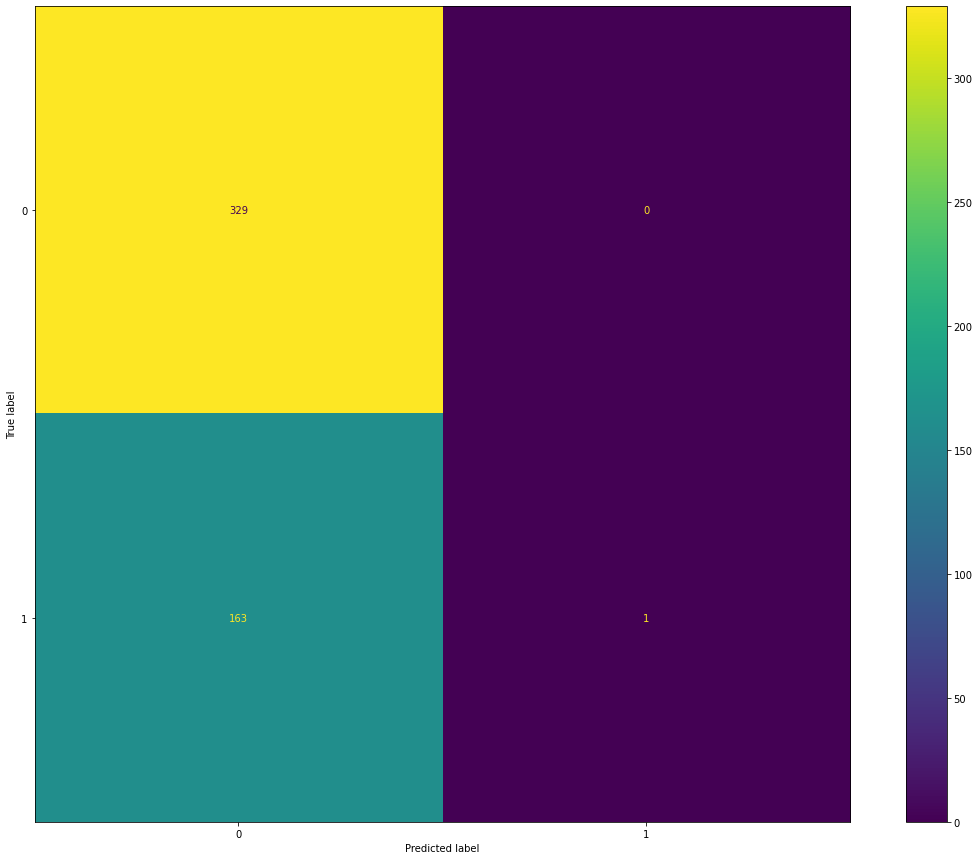

In [210]:
plt.figure(figsize = (3,3))
clf.fit(x_train, z_train)
plot_confusion_matrix(clf3, x_test, z_test)  
plt.grid(False)# delete white grid lines